In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# *Assignment Summary

You can find a dataset dealing with European employment in 1979 at http://www.dm.unibo.it/~simoncin/EuropeanJobs.html. This dataset gives the percentage of people employed in each of a set of areas in 1979 for each of a set of European countries. Notice this dataset contains only 26 data points. That's fine; it's intended to give you some practice in visualization of clustering.

1. Use agglomerative clustering to cluster this data. Produce a dendrogram of this data for each of single link, complete link, and group average clustering. You should label the countries on the axis. What structure in the data does each method expose? You should see dendrograms that "make sense" (at least if you remember some European history), and have interesting differences.

2. Using k-means, cluster this dataset. What is a good choice of k for this data and why?

# 0. Data

## 0.1 Description

You can find a dataset dealing with European employment in 1979 at http://www.dm.unibo.it/~simoncin/EuropeanJobs.html. This dataset gives the percentage of people employed in each of a set of areas in 1979 for each of a set of European countries. Notice this dataset contains only 26 data points. That's fine; it's intended to give you some practice in visualization of clustering.

## 0.2 Loading

In [2]:
df = pd.read_csv("../Clustering-lib/EuropeanJobs.dat", sep='\t', header=0)

In [3]:
df

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1
5,Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7
6,Luxembourg,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2
7,Netherlands,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8
8,United Kingdom,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4
9,Austria,12.7,1.1,30.2,1.4,9.0,16.8,4.9,16.8,7.0


Here is a description of the columns in the data:
- Country: name of the country
- Agr: percentage employed in agriculture
- Min: percentage employed in mining
- Man: percentage employed in manufacturing
- PS: percentage employed in power supply industries 
- Con: percentage employed in construction
- SI: percentage employed in service industries
- Fin: percentage employed in finance
- SPS: percentage employed in social and personal services
- TC: percentage employed in transport and communications

In [4]:
feature_cols = ['Agr','Min','Man','PS','Con','SI','Fin','SPS','TC'] 
X = df[feature_cols].values
Y = df['Country'].tolist()

# 1. Agglomerative Clustering

# <span style="color:blue">Task 1</span>

Write a function `single_linkage` that produces a single-link agglomerative clustering. This function should take the data matrix `X` as input, which is a numpy array with the shape of $(N,d)$ where $N$ is the number of samples and $d$ is the number of features. The output of the function should be a linkage matrix. Use the Euclidean distance as a metric. 

You may find scipy's hierarchical clustering methods (https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) useful here. The utilization of the `optimal_ordering` option makes interpretations of the resulting trees an easier job.

In [7]:
def single_linkage(X):
    """
    Produce a single-link agglomerative clustering.
    
        Parameters:
                X (np.array): A numpy array of the shape (N,d) where N is the number of samples and d is the number of features.
                
        Returns:
                single_link (np.array): The single-link agglomerative clustering of X encoded as a linkage matrix.
    """
    
    # your code here
    single_link = hierarchy.linkage(X, optimal_ordering=True)
    
    return single_link

In [8]:
single_link = single_linkage(X)
assert single_link[:,2].min().round(3) == 4.234

In [9]:
# Next, we will plot the dendogram for the first task.


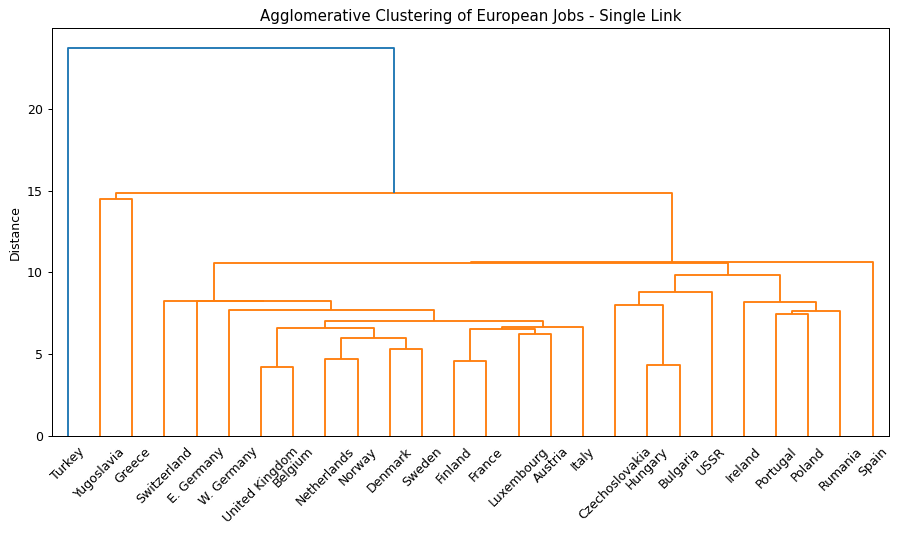

In [10]:
single_link = single_linkage(X)
plt.figure(figsize=(12,6), dpi=90)
plt.ylabel("Distance")
plt.title("Agglomerative Clustering of European Jobs - Single Link")
dn_single = hierarchy.dendrogram(single_link, labels=Y)

# <span style="color:blue">Task 2</span>

Write a function `complete_linkage` that produces a complete-link agglomerative clustering. This function should take the data matrix `X` as input, which is a numpy array with the shape of $(N,d)$ where $N$ is the number of samples and $d$ is the number of features. The output of the function should be a linkage matrix. Use the Euclidean distance as a metric. 

You may find scipy's hierarchical clustering methods (https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) useful here. The utilization of the `optimal_ordering` option makes interpretations of the resulting trees an easier job.

In [11]:
def complete_linkage(X):
    """
    Produce a complete-link agglomerative clustering.
    
        Parameters:
                X (np.array): A numpy array of the shape (N,d) where N is the number of samples and d is the number of features.
                
        Returns:
                comp_link (np.array): The complete-link agglomerative clustering of X encoded as a linkage matrix.
    """
    
    # your code here
    comp_link = hierarchy.linkage(X, method='complete' , optimal_ordering=True)
    
    return comp_link

In [12]:
comp_link = complete_linkage(X)
assert comp_link[:,2].max().round(3) == 72.278

In [13]:
# Next, we will plot the dendogram for the second task.


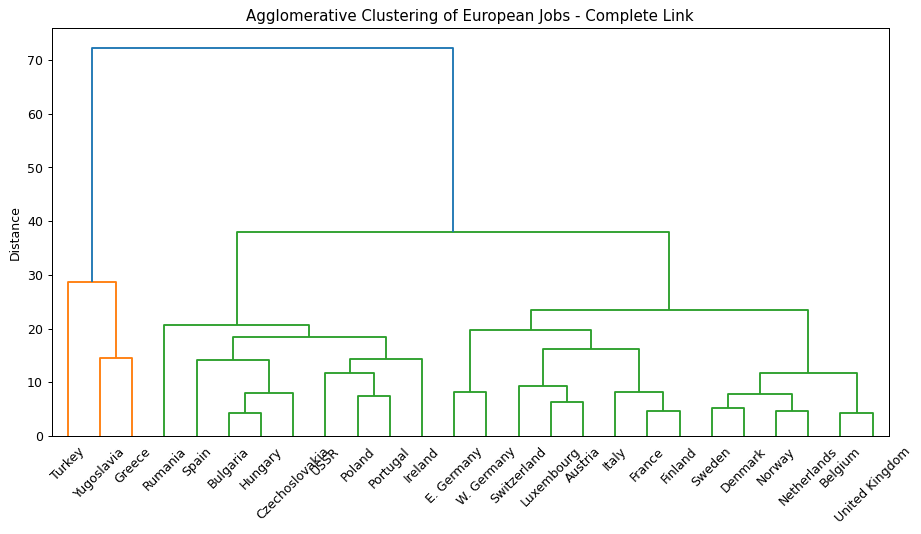

In [14]:
complete_link = complete_linkage(X)
plt.figure(figsize=(12,6), dpi=90)
plt.ylabel("Distance")
plt.title("Agglomerative Clustering of European Jobs - Complete Link")
dn_complete = hierarchy.dendrogram(complete_link,labels=Y)

# <span style="color:blue">Task 3</span>

Write a function `group_avg_linkage` that produces an average-link agglomerative clustering. This function should take the data matrix `X` as input, which is a numpy array with the shape of $(N,d)$ where $N$ is the number of samples and $d$ is the number of features. The output of the function should be a linkage matrix. Use the Euclidean distance as a metric. 

You may find scipy's hierarchical clustering methods (https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) useful here. The utilization of the `optimal_ordering` option makes interpretations of the resulting trees an easier job.

In [15]:
def group_avg_linkage(X):
    """
    Produce an average-link agglomerative clustering.
    
        Parameters:
                X (np.array): A numpy array of the shape (N,d) where N is the number of samples and d is the number of features.
                
        Returns:
                avg_link (np.array): The average-link agglomerative clustering of X encoded as a linkage matrix.
    """
    
    # your code here
    avg_link = hierarchy.linkage(X, method='average' , optimal_ordering=True)
    
    return avg_link

In [16]:
avg_link = group_avg_linkage(X)
assert avg_link[:,2].max().round(3) == 44.172

In [17]:
# Next, we will plot the dendogram for the third task.


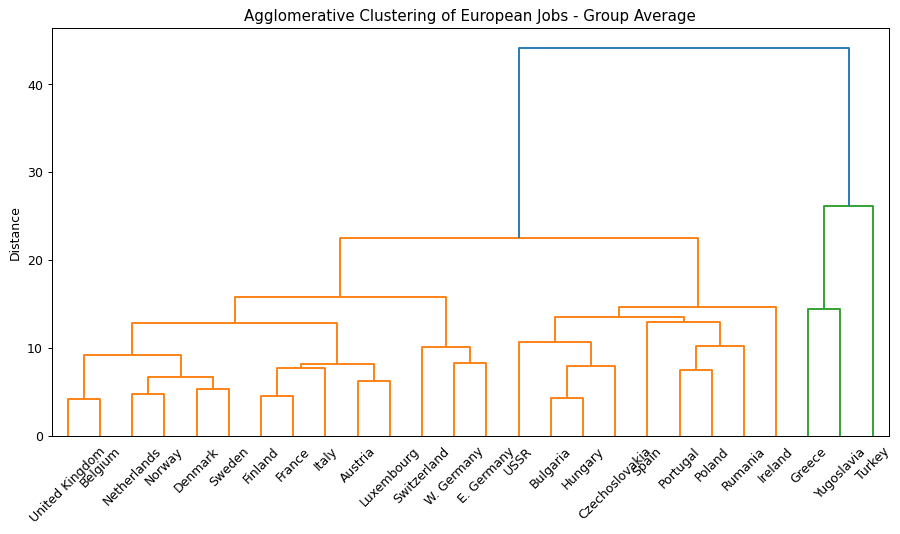

In [18]:
average_link = group_avg_linkage(X)
plt.figure(figsize=(12,6), dpi=90)
plt.ylabel("Distance")
plt.title("Agglomerative Clustering of European Jobs - Group Average")
dn_average = hierarchy.dendrogram(average_link,labels=Y)

# 2. K-Means Clustering

In this part, we perform the K-Means clustering algorithm on the dataset, and evalute the effect of the parameter $k$ (the number of clusters) on the outcome.

For this, we use the `KMeans` class from `sklearn.cluster`. You should familiarize yourself with this class. You can find the documentation of it here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html 

In the following code, we run the K-Means algorithm for $2 \leq k \leq 25$ clusters.

<font color='red'><b>Attention:</font> Although you are not implementing this part, for the follow-up quiz of this assignment, you will need to come back here, write some code and do some calculations to get the answer of some questions in the quiz. For now, try to read the documentation for the `KMeans` class and try to understand what the following code is doing.

In [19]:
k_list = list(range(2,26))
k_inertias = []
k_scores = []
model_list = []
for k in k_list:
    model = KMeans(n_clusters=k, random_state=12345).fit(X)
    model_list.append(model)
    cluster_assignments = model.labels_
    score = silhouette_score(X, cluster_assignments, metric='euclidean')
    inertia = model.inertia_
    k_scores.append(score)
    k_inertias.append(inertia)

In [30]:
model = KMeans(n_clusters=3, random_state=12345).fit(X)
cluster = model.labels_
print(cluster)


[0 0 0 0 2 0 0 0 0 0 0 1 0 2 2 0 0 1 2 2 0 2 2 2 2 1]


Now, we plot the sum of square distances of samples to their closest cluster center as a function of $k$, the numebr of clusters. 

4254.534285714285


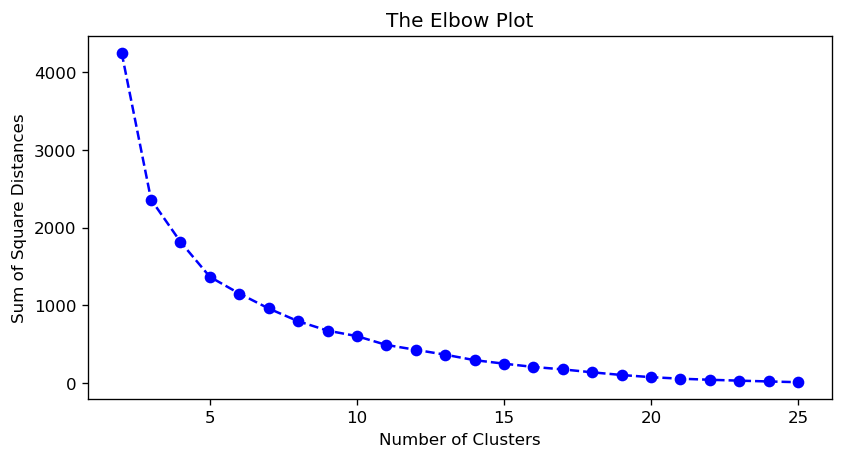

In [23]:
plt.figure(figsize=(8,4), dpi=120)
plt.title('The Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Square Distances')
_=plt.plot(k_list, k_inertias,'bo--')
print(k_inertias[0])

Look at the above *Elbow plot*. Based on this plot, what do you think is a reasonable choice of $k$?

Next, we plot the so called "*silhouette*" score for the result of the K-Means clustering algorithm for the values of $k$ we implemented above. The silhouette score is a measure of how similar an object is to its cluster compared to other clusters. 

- Try to learn how the silhouette score is defined. For instance, you can look at this Wikipedia page: [https://en.wikipedia.org/wiki/Silhouette_(clustering)](https://en.wikipedia.org/wiki/Silhouette_%28clustering%29).

- What is the range of the silhouette score?
- Is a larger value of the silhouette score better or worse?

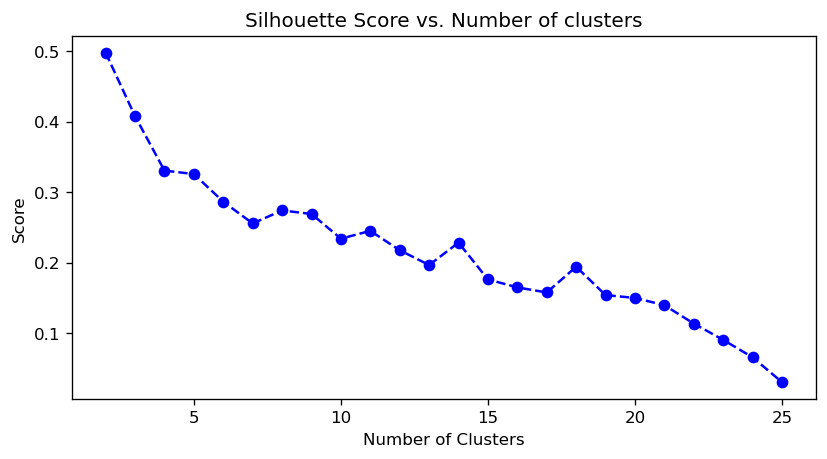

In [21]:
plt.figure(figsize=(8,4), dpi=120)
plt.title('Silhouette Score vs. Number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
_=plt.plot(k_list, k_scores,'bo--')

Based on the silhouette measure, what do you think is a reasonable value for $k$? Is this the same value that the above elbow plot suggests? Why do think so?